In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.optimize import minimize

# Question 1

# (c)

In [2]:
df = pd.read_csv('songs.csv')

# Delete the Categorical Sets
del df["Artist Name"]
del df["Track Name"]
del df["key"]
del df["mode"]
del df["time_signature"]
del df["instrumentalness"]

print(df)

       Popularity  danceability  energy  loudness  speechiness  acousticness  \
0            60.0         0.854   0.564    -4.964       0.0485      0.017100   
1            54.0         0.382   0.814    -7.230       0.0406      0.001100   
2            35.0         0.434   0.614    -8.334       0.0525      0.486000   
3            66.0         0.853   0.597    -6.528       0.0555      0.021200   
4            53.0         0.167   0.975    -4.279       0.2160      0.000169   
...           ...           ...     ...       ...          ...           ...   
17991        35.0         0.166   0.109   -17.100       0.0413      0.993000   
17992        27.0         0.638   0.223   -10.174       0.0329      0.858000   
17993        34.0         0.558   0.981    -4.683       0.0712      0.000030   
17994        29.0         0.215   0.805   -12.757       0.1340      0.001290   
17995        43.0         0.400   0.853    -5.320       0.0591      0.006040   

       liveness  valence    tempo  dura

In [3]:
hippop = df.loc[(df["Class"] == 5) | (df["Class"] == 9)]
hippop = hippop.dropna()
hippop.loc[hippop.Class == 5, 'Class'] = 1
hippop.loc[hippop.Class == 9, 'Class'] = -1
print(hippop)

       Popularity  danceability  energy  loudness  speechiness  acousticness  \
0            60.0         0.854   0.564    -4.964       0.0485        0.0171   
3            66.0         0.853   0.597    -6.528       0.0555        0.0212   
9            14.0         0.716   0.885    -4.348       0.0333        0.0614   
12           34.0         0.585   0.381    -7.622       0.0463        0.4350   
16           14.0         0.713   0.939    -3.609       0.0372        0.1100   
...           ...           ...     ...       ...          ...           ...   
17965        53.0         0.697   0.777    -3.472       0.0834        0.0107   
17970        72.0         0.647   0.844    -3.756       0.0457        0.0137   
17972        69.0         0.552   0.846    -4.912       0.3420        0.0114   
17978        55.0         0.384   0.820    -3.928       0.2010        0.3970   
17989        20.0         0.597   0.633    -8.163       0.0971        0.0101   

       liveness  valence    tempo  dura

In [4]:
target = hippop["Class"]
del hippop["Class"]

target = target.to_numpy()
hippop = hippop.to_numpy()

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(hippop,target,test_size=0.30,random_state=23)

In [5]:
# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Print out X train data
X_train_first,X_train_last=X_train[0],X_train[-1]
print(X_train_first[0:3]); print(X_train_last[0:3])

[-0.93555843  0.67519298  1.3849985 ]
[-1.13301479 -1.09458877  0.96702449]


In [7]:
# Print out X test data
X_test_first,X_test_last=X_test[0],X_test[-1]
print(X_test_first[0:3]); print(X_test_last[0:3])

[-0.29382524  1.36005105  0.26306826]
[-0.29382524 -1.05390413 -1.34833155]


In [8]:
# Print out Y train data
y_train_first,y_train_last=y_train[0],y_train[-1]
print(y_train_first); print(y_train_last)

-1
1


In [9]:
# Print out Y test data
y_test_first,y_test_last=y_test[0],y_test[-1]
print(y_test_first); print(y_test_last)

-1
1


# (e)

In [10]:
def reg_log_loss(W, C, X, y):
    tot = 0
    c = W[0]
    w = W[1:]
    loss = 1/2*w.T@w+C*sum(-y*(w@X.T+c)+np.logaddexp(y*(w.T@X.T+c),0))
    return loss

In [11]:
c = -1.4
w = 0.1 * np.ones(X_train.shape[1])
W = np.insert(w, 0, c)
reg_log_loss(W=W, C=0.001, X=X_train, y=y_train) # returns 1.9356538918069666

1.9356538918069661

In [12]:
c = 1.2
w = 0.35 * np.ones(X_train.shape[1])
W = np.insert(w, 0, c)
reg_log_loss(W=W, C=0.001, X=X_train, y=y_train)

3.298785138195727

# (f)

In [13]:
def reg_log_fit(X, y, C):
    g = lambda W: reg_log_loss(W, C, X, y)
    w = 0.1 * np.ones(X_train.shape[1])
    W0 = np.insert(w,0, -1.4)
    W = minimize(fun=g, x0=W0, method='Nelder-Mead', tol=1e-6, options = {'maxfev':10000})
    return W

In [14]:
W = reg_log_fit(X=X_train, y=y_train, C=0.4)

In [15]:
c = W.x[0]
w = W.x[1:]
predictions = 1/(1+np.exp(-(w@X_train.T+c)))
train_loss = log_loss(y_train,predictions)
print(train_loss)

0.39949213357074087


In [16]:
predictions = 1/(1+np.exp(-(w@X_test.T+c)))
test_loss = log_loss(y_test,predictions)
print(test_loss)

0.39939623876525937


In [17]:
logreg = LogisticRegression(C=1, tol=1e-6, penalty='l2', solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict_proba(X_train)
train_loss = log_loss(y_train,y_pred)
print(train_loss)

0.39947109084441795


In [18]:
y_pred=logreg.predict_proba(X_test)
test_loss = log_loss(y_test,y_pred)
print(test_loss)

0.39927190185402517


# (g)

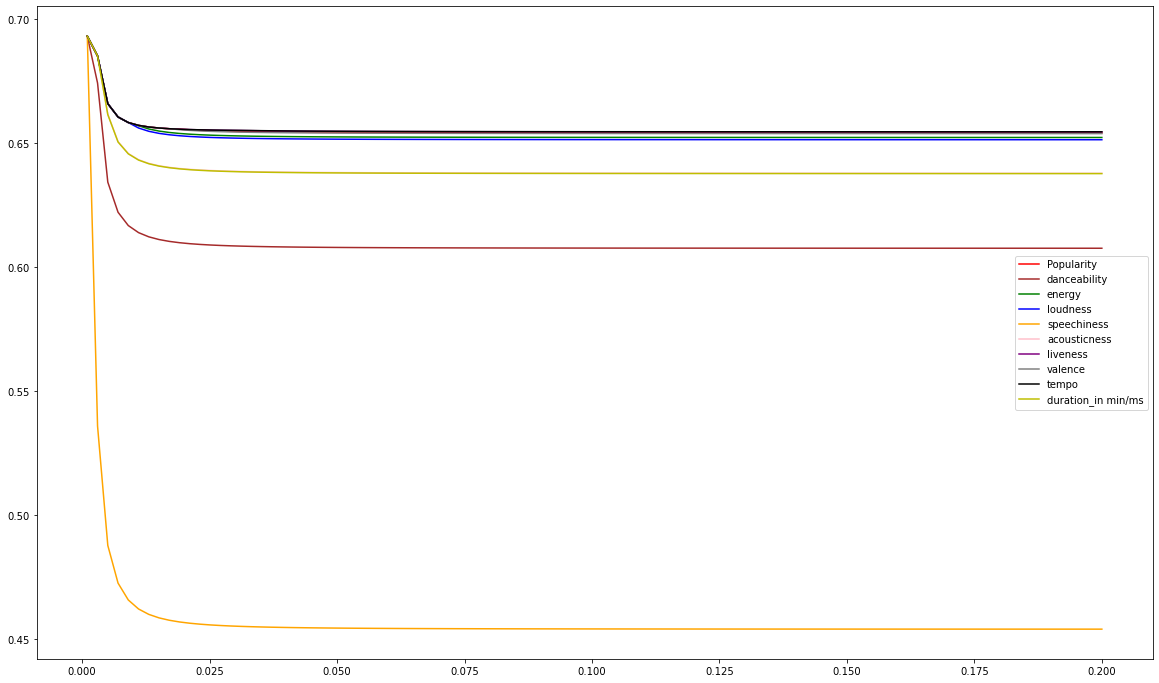

In [19]:
Cs = np.linspace(0.001, 0.2, num=100)
plt.rcParams['figure.figsize'] = [20, 12]
colour = np.array(['red', 'brown', 'green', 'blue', 'orange', 'pink', 'purple', 'grey', 'black', 'y'])
legend = np.array(['Popularity','danceability','energy','loudness','speechiness','acousticness','liveness','valence','tempo','duration_in min/ms'])
for n in range(X_train.shape[1]):
    loss = 0
    for c in Cs:
        logreg = LogisticRegression(penalty='l1', solver='liblinear', C=c)
        logreg.fit(X_train[:,n].reshape(-1, 1),y_train)
        y_pred = logreg.predict_proba(X_train[:,n].reshape(-1, 1))
        loss = np.append(loss,log_loss(y_train,y_pred))
    loss = np.delete(loss,0)
    plt.plot(Cs,loss,colour[n],label = legend[n])
plt.legend()
plt.show()

# (h)

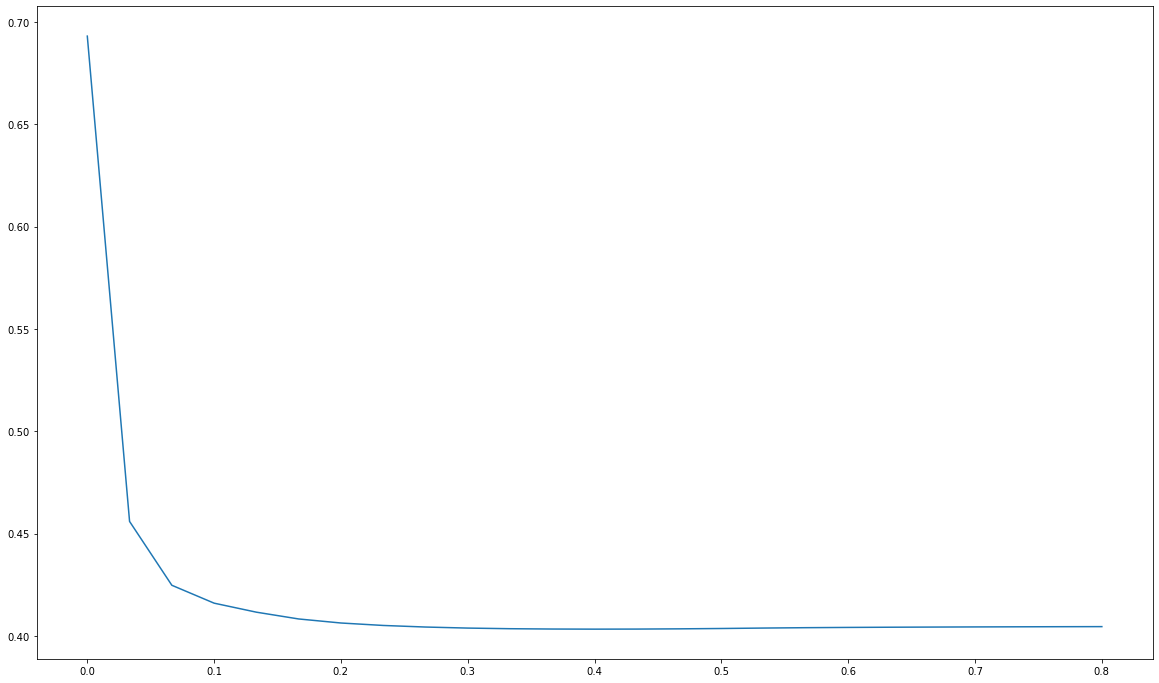

In [20]:
Cs = np.linspace(0.0001, 0.8, num=25)
all_classes = np.array([-1,1])
n = 544
X_train_small = np.copy(X_train)
X_train_small = X_train_small[0:n]
y_train_small = np.copy(y_train)
y_train_small = y_train_small[0:n]
CV = 0
for c in Cs:
    loss = 0
    for i in range(n):
        LOOCV_X = np.delete(X_train_small, i, 0)
        LOOCV_y = np.delete(y_train_small, i)
        logreg = LogisticRegression(penalty='l1', solver='liblinear', C=c)
        logreg.fit(LOOCV_X,LOOCV_y)
        y_pred = logreg.predict_proba(X_train_small[i].reshape(1,-1))
        loss = loss + log_loss(np.array([y_train_small[i]]),y_pred,labels=all_classes)
    CV = np.append(CV,loss/n)
CV = np.delete(CV,0)
plt.plot(Cs,CV)
plt.show()
        

# Question 2

In [21]:
import numpy as np
import pandas as pd # not really needed, only for preference
import matplotlib.pyplot as plt
from util import *

# (a)

In [22]:
def perceptron(X, y, max_iter=100):
    np.random.seed(1)
    w = np.zeros(X.shape[1])
    for t in range(max_iter):
        break_int = 0
        mistakes = 0
        for i in range(X.shape[0]):
            if y[i]*w@X[i].T<=0:
                mistakes = np.append(mistakes,i)
                break_int = 1              
                
        if break_int == 0:
            break
        mistakes = np.delete(mistakes,0)
        mistake = np.random.choice(mistakes)
        w = w+y[mistake]*X[mistake]

    return w, t

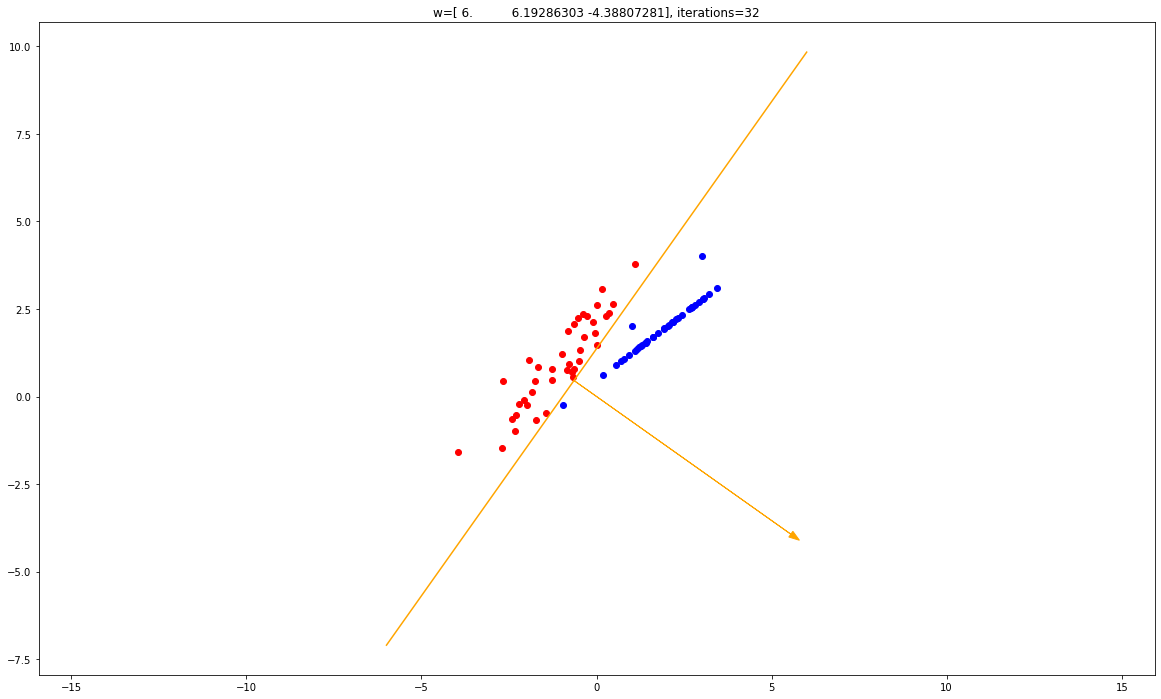

In [23]:
X = pd.read_csv('PerceptronX.csv')
y = pd.read_csv('Perceptrony.csv')
X = X.to_numpy()
y = y.to_numpy()
w = perceptron(X, y, max_iter=100)
nmb_iter = w[1]
w = w[0]
fig, ax = plt.subplots()
plot_perceptron(ax, X, y, w) # your implementation
ax.set_title(f"w={w}, iterations={nmb_iter}")
plt.show()

# (b)

In [24]:
def dual_perceptron(X, y, max_iter=100):
    np.random.seed(1)
    a = np.zeros(X.shape[0])
    for t in range(max_iter):
        break_int = 0
        mistakes = 0
        for i in range(X.shape[0]):
            total = 0
            for j in range(X.shape[0]):
                total = total+y[j]*a[j]*X[j].T@X[i]
            if y[i]*total<=0:
                mistakes = np.append(mistakes,i)
                break_int = 1
        if break_int == 0:
            break
        mistakes = np.delete(mistakes,0)
        mistake = np.random.choice(mistakes)
        a[mistake] = a[mistake]+1

    return a, t

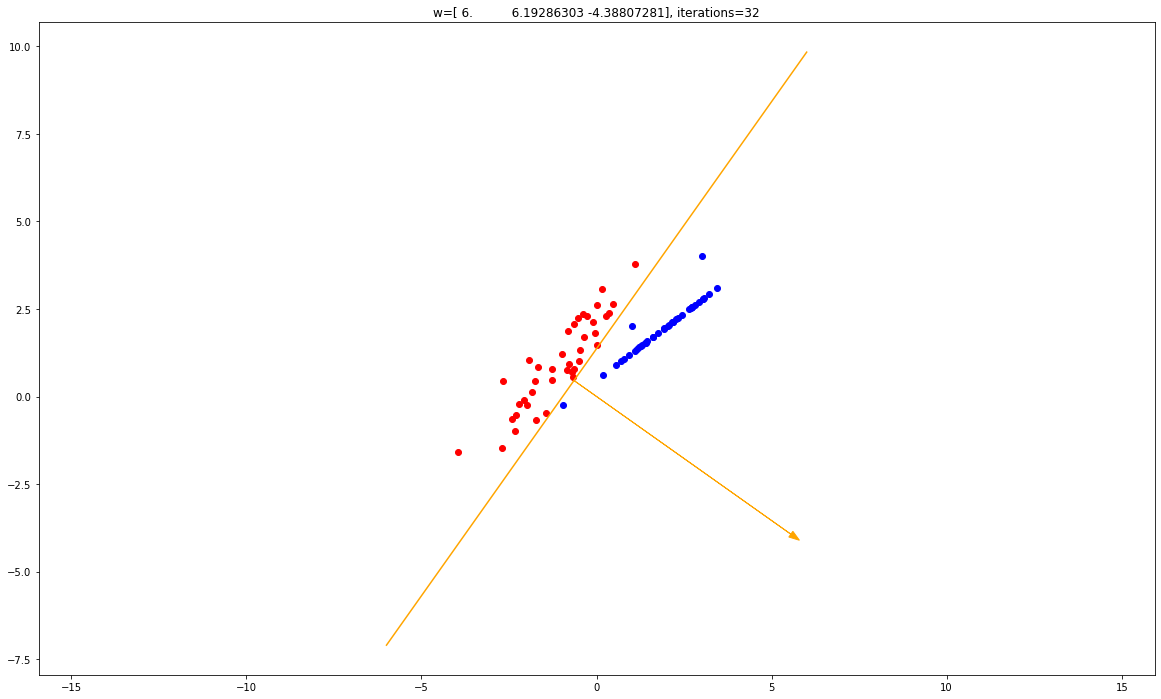

<function matplotlib.pyplot.show(close=None, block=None)>

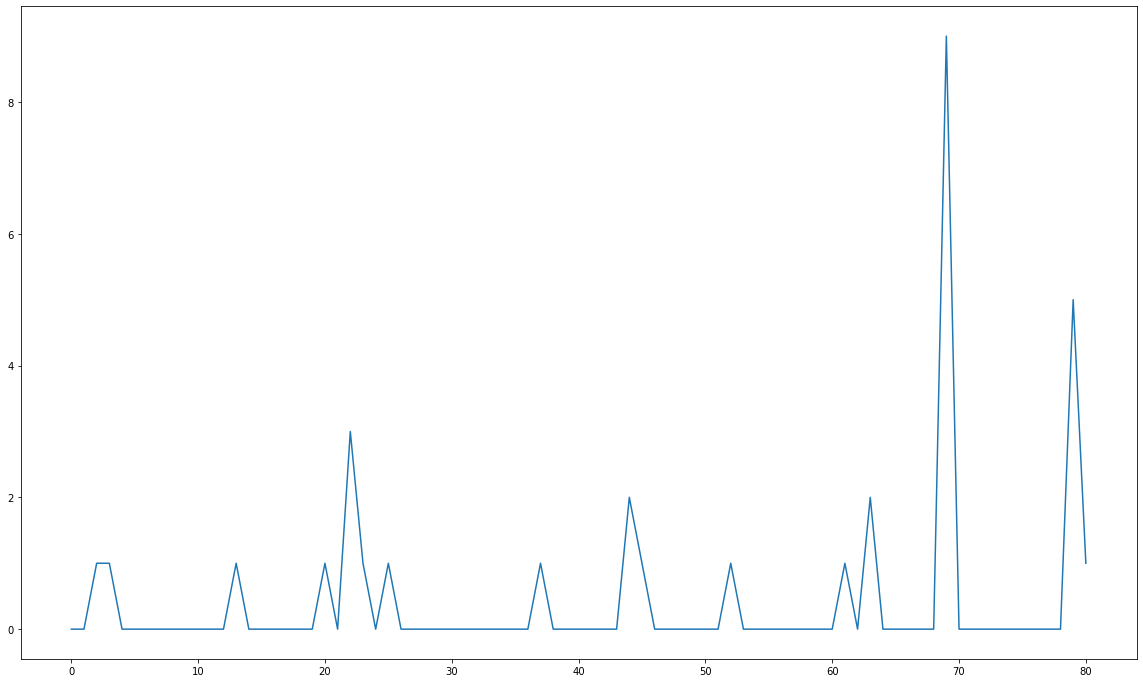

In [25]:
X = pd.read_csv('PerceptronX.csv')
y = pd.read_csv('Perceptrony.csv')
X = X.to_numpy()
y = y.to_numpy()
a = dual_perceptron(X, y, max_iter=100)
nmb_iter = a[1]
a = a[0]
w = 0
for i in range(X.shape[0]):
    w = w+a[i]*y[i]*X[i]
fig, ax = plt.subplots()
plot_perceptron(ax, X, y, w) # your implementation
ax.set_title(f"w={w}, iterations={nmb_iter}")
plt.show()

plt.plot(range(a.shape[0]),a)
plt.show

# (c)

In [26]:
def r_perceptron(X, y, max_iter=100):
    np.random.seed(1)
    r = 2
    w = np.zeros(X.shape[1])
    I = np.zeros(X.shape[0])
    for t in range(max_iter):
        break_int = 0
        mistakes = 0
        for i in range(X.shape[0]):
            if y[i]*w@X[i].T+I[i]*r<=0:
                mistakes = np.append(mistakes,i)
                break_int = 1              
                
        if break_int == 0:
            break
        mistakes = np.delete(mistakes,0)
        mistake = np.random.choice(mistakes)
        w = w+y[mistake]*X[mistake]
        I[mistake] = 1

    return w, t

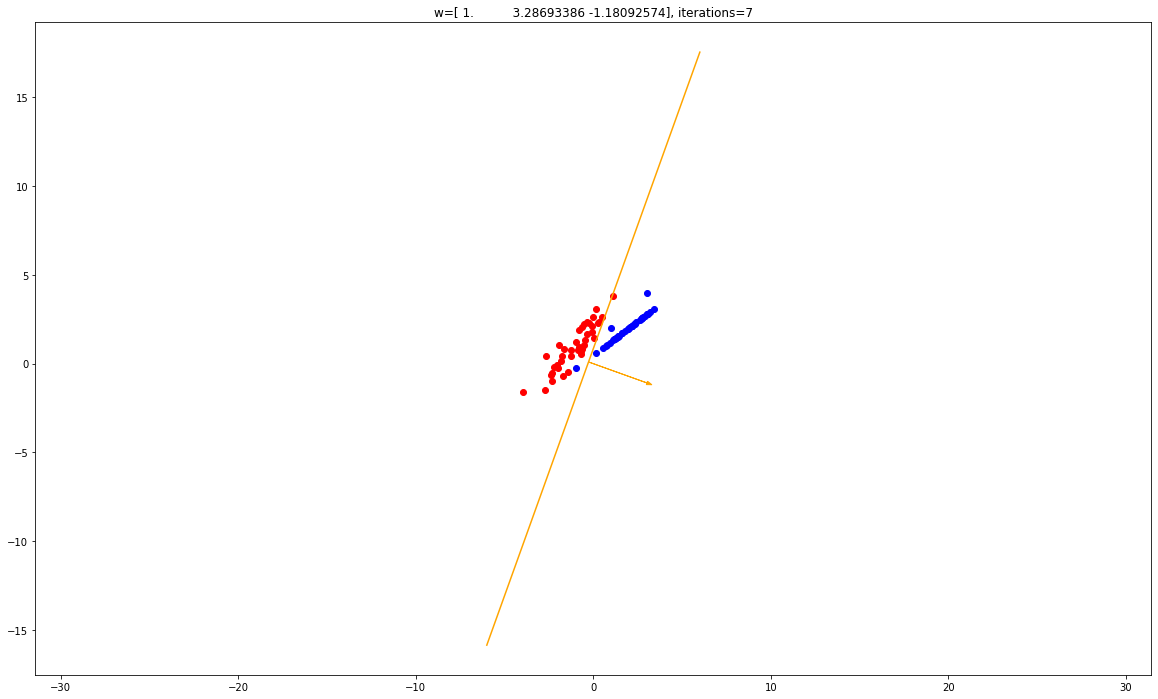

In [27]:
X = pd.read_csv('PerceptronX.csv')
y = pd.read_csv('Perceptrony.csv')
X = X.to_numpy()
y = y.to_numpy()
w = r_perceptron(X, y, max_iter=100)
nmb_iter = w[1]
w = w[0]
fig, ax = plt.subplots()
plot_perceptron(ax, X, y, w) # your implementation
ax.set_title(f"w={w}, iterations={nmb_iter}")
plt.show()

# (d)

In [28]:
def dual_r_perceptron(X, y, max_iter=100):
    np.random.seed(1)
    r = 2
    a = np.zeros(X.shape[0])
    I = np.zeros(X.shape[0])
    for t in range(max_iter):
        break_int = 0
        mistakes = 0
        for i in range(X.shape[0]):
            total = 0
            for j in range(X.shape[0]):
                total = total+y[j]*a[j]*X[j].T@X[i]
            if y[i]*total+I[i]*r<=0:
                mistakes = np.append(mistakes,i)
                break_int = 1
        if break_int == 0:
            break
        mistakes = np.delete(mistakes,0)
        mistake = np.random.choice(mistakes)
        a[mistake] = a[mistake]+1
        I[mistake] = 1

    return a, t

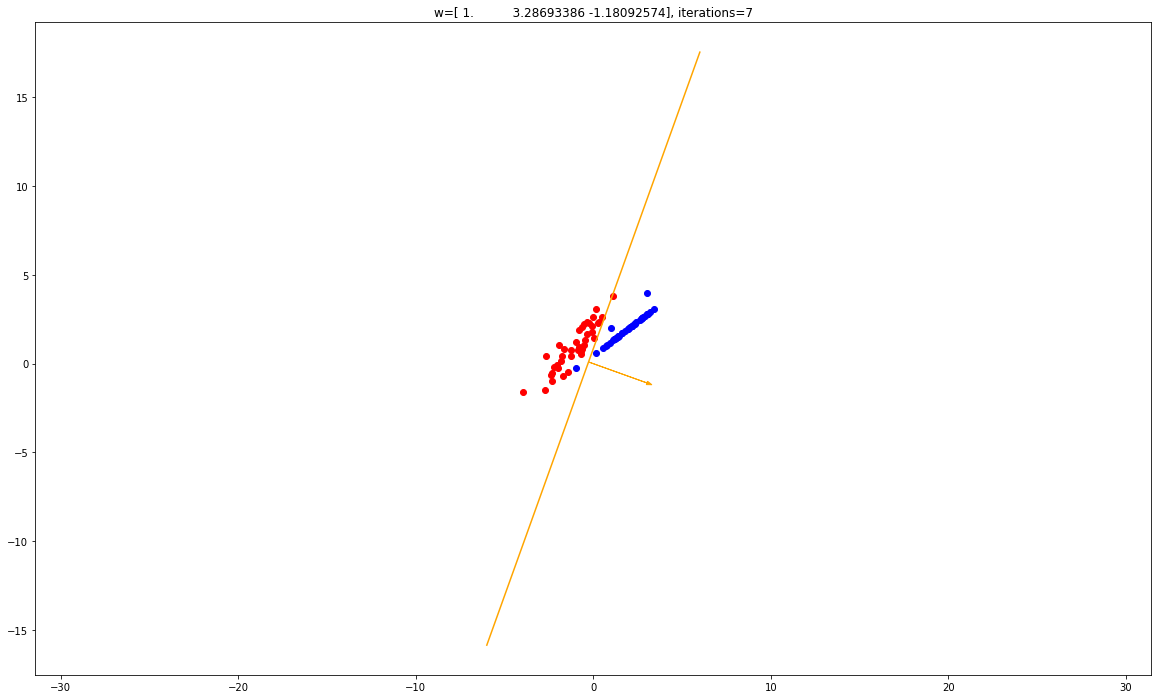

<function matplotlib.pyplot.show(close=None, block=None)>

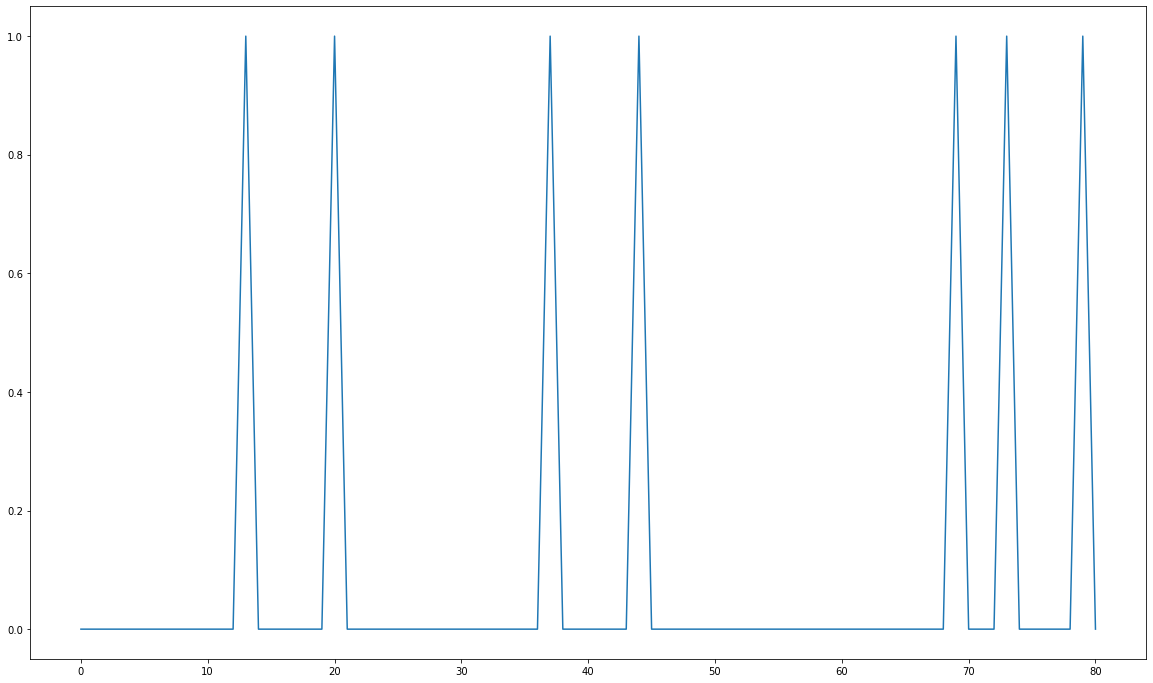

In [29]:
X = pd.read_csv('PerceptronX.csv')
y = pd.read_csv('Perceptrony.csv')
X = X.to_numpy()
y = y.to_numpy()
a = dual_r_perceptron(X, y, max_iter=100)
nmb_iter = a[1]
a = a[0]
w = 0
for i in range(X.shape[0]):
    w = w+a[i]*y[i]*X[i]
fig, ax = plt.subplots()
plot_perceptron(ax, X, y, w) # your implementation
ax.set_title(f"w={w}, iterations={nmb_iter}")
plt.show()

plt.plot(range(a.shape[0]),a)
plt.show